In [1]:
!pip install opencv-python


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


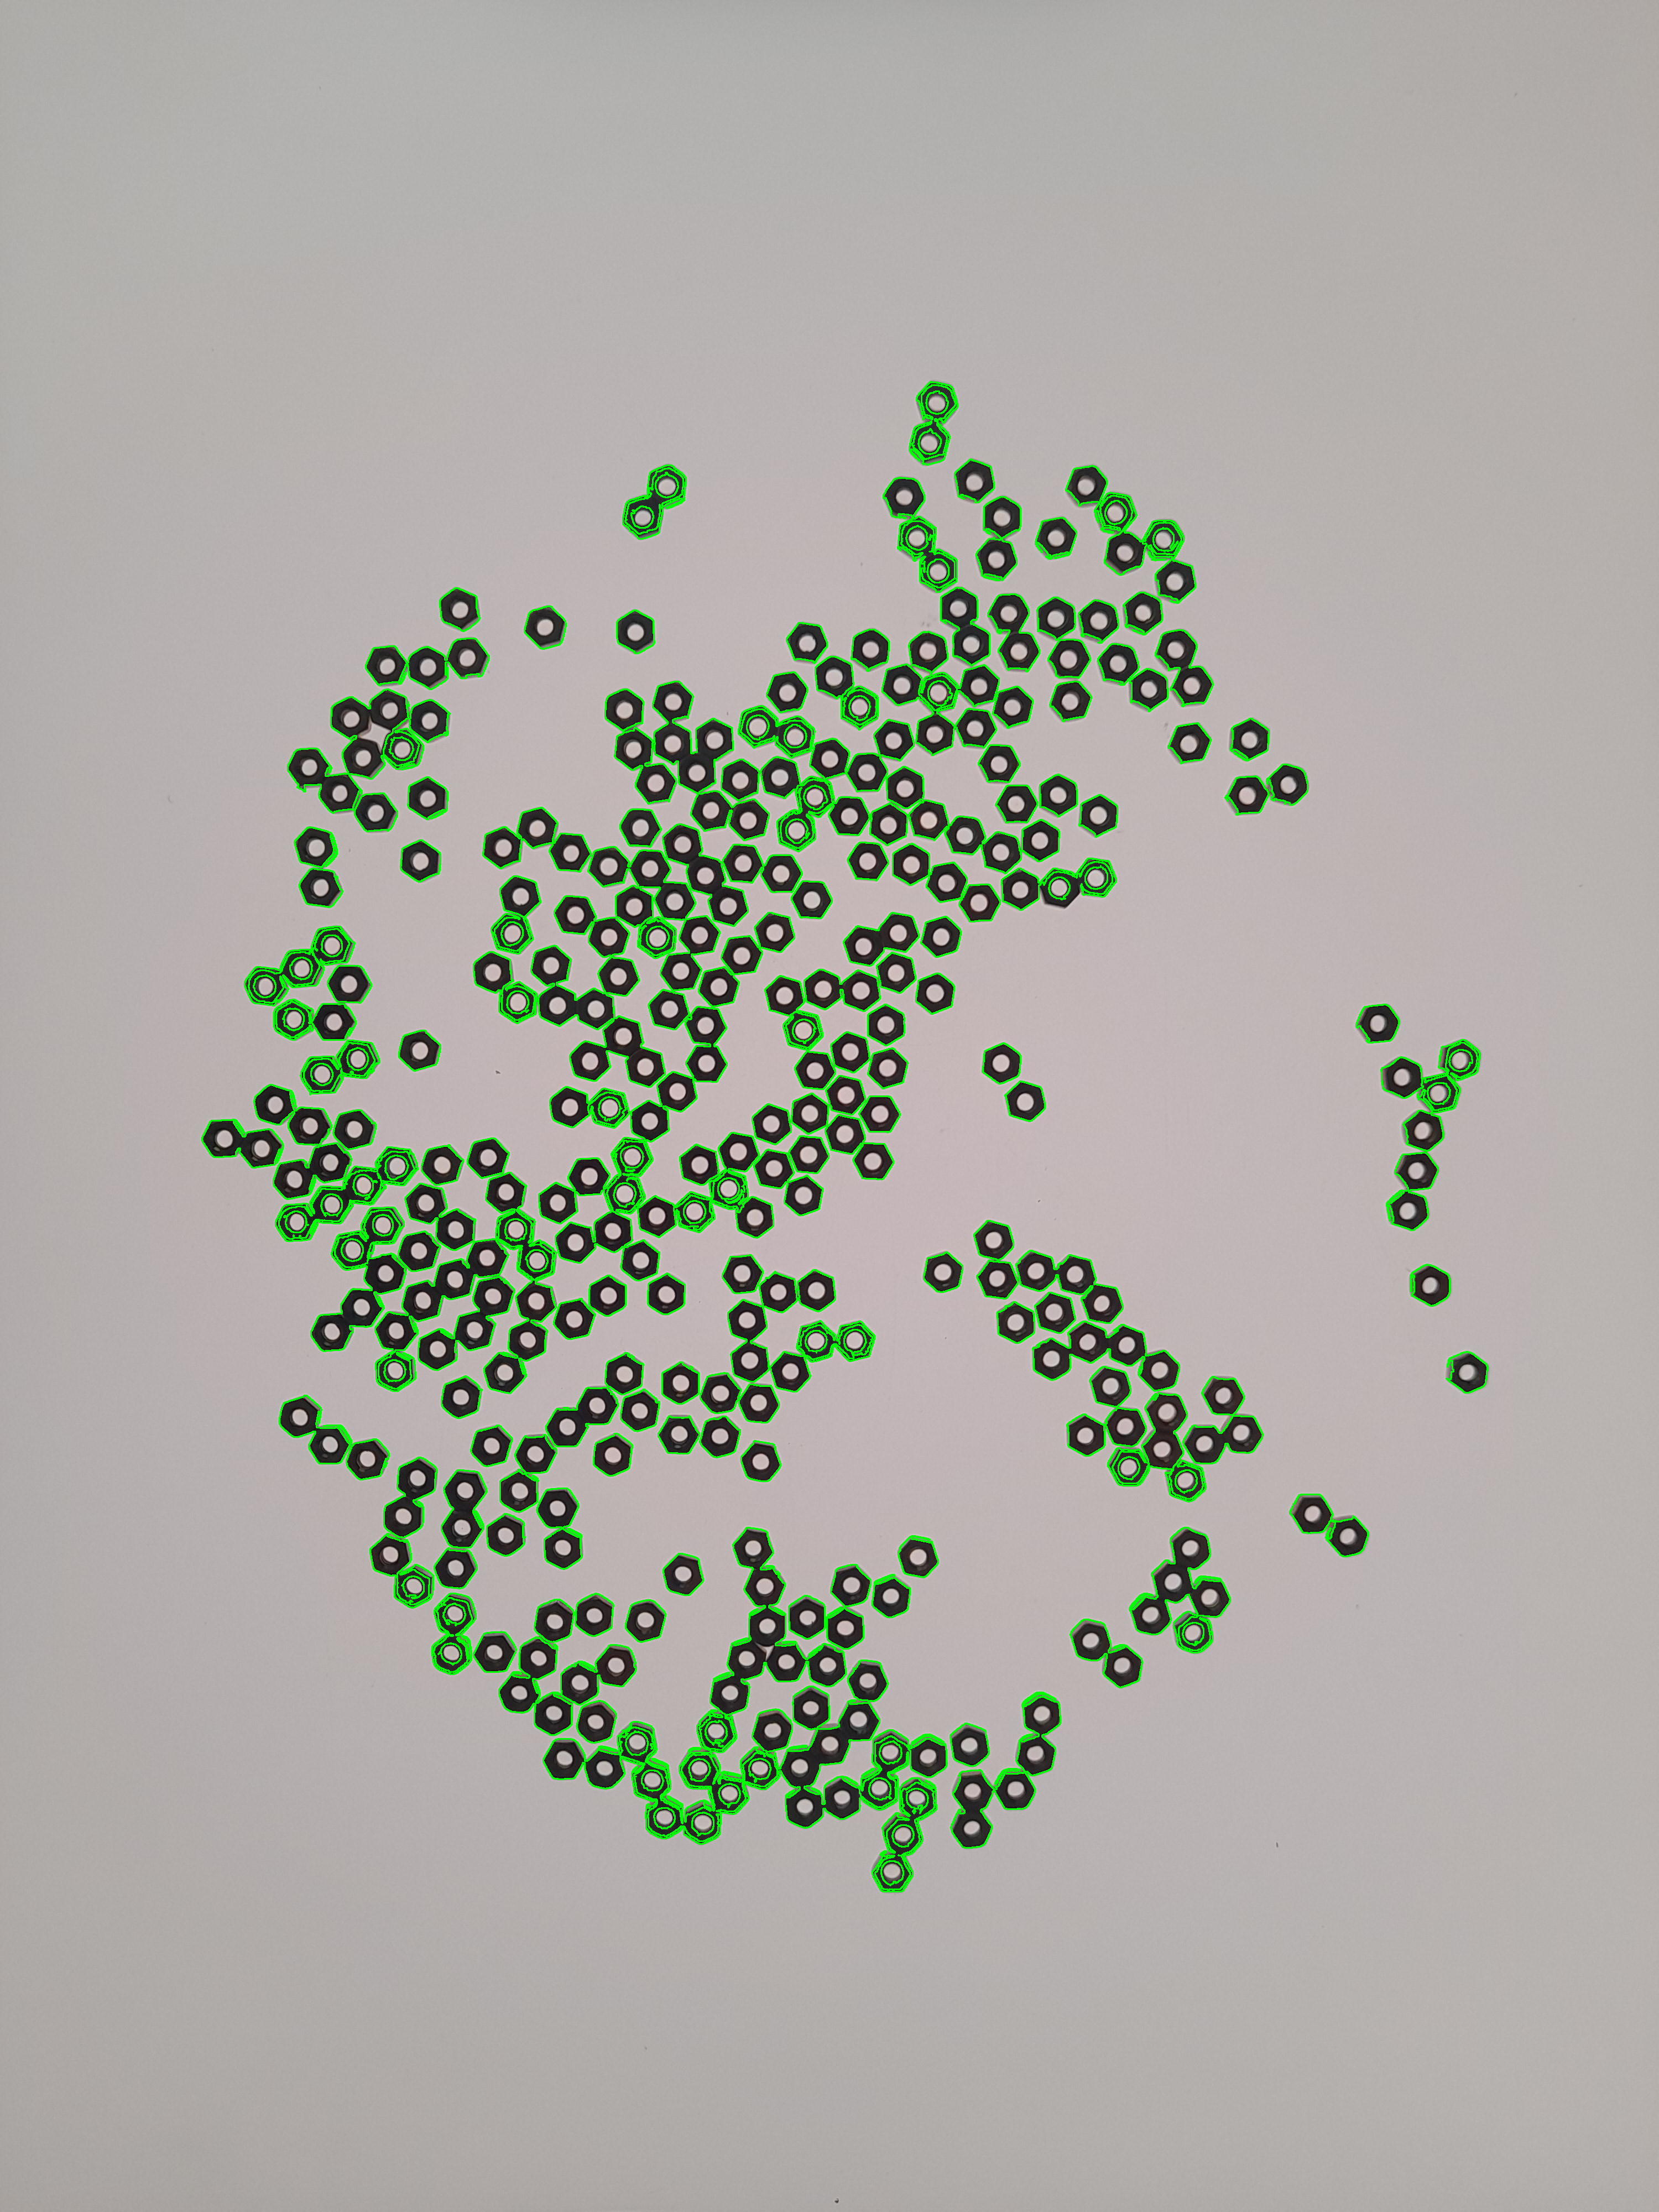

Number of screws and bolts: 211


In [23]:
import cv2
import numpy as np

def count_screws_and_bolts(image_path, min_contour_area=100):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the image to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use adaptive thresholding to handle varying lighting conditions
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Apply morphological operations to reduce noise and remove shadows
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Draw filtered contours on the original image (optional)
    cv2.drawContours(image, filtered_contours, -1, (0, 255, 0), 2)

    #   # Put the count text on the image
    # text = f'Count: {filtered_contours}'
    # cv2.putText(image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Display the original image with contours
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Count the number of filtered contours (screws and bolts)
    num_screws_and_bolts = len(filtered_contours)
    return num_screws_and_bolts

# Path to your image
image_path = '/content/20240713_194630.jpg'

# Count the screws and bolts
num_screws_and_bolts = count_screws_and_bolts(image_path, min_contour_area=500)  # Adjust the min_contour_area as needed
print(f'Number of screws and bolts: {num_screws_and_bolts}')
